#Introduction
In this project we're trying to solve inverted penulum problem with fuzzy controller.

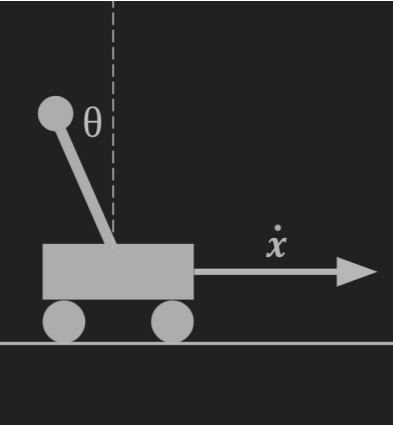

Which in we're trying to stablize the carriage by applying the $\overset{\cdot}{x}$ force(Keep the angle Θ at a value close to 0).

Our inputs contain :

1.   Pendulum angle with axis perpendicular to the cart($\theta$).(pa)
2.   Angular speed of the pendulum($\Omega$).(pv)
3.   Cart's position.(cp)
4.   Cart speed along the x-axis.(cv)

Finally, the output of the problem is the force F, which is the force applied to the cart along the x-axis.



# Fuzzification
To solve a problem with the help of fuzzy logic, our values need to be converted from absolute to fuzzy (inaccurate, relative).
This process is called fuzzification.
For fuzzification of each in inputs, we define them as shown in the following charts.
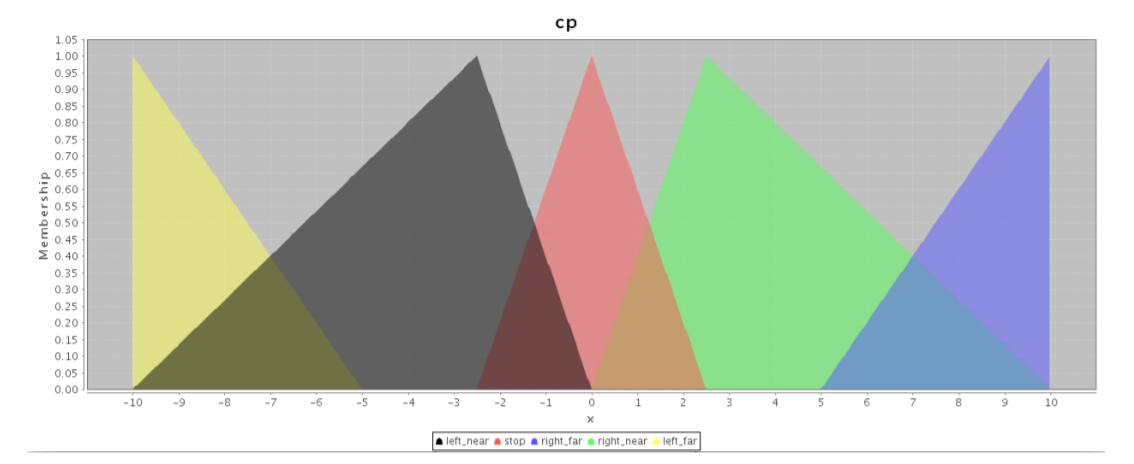

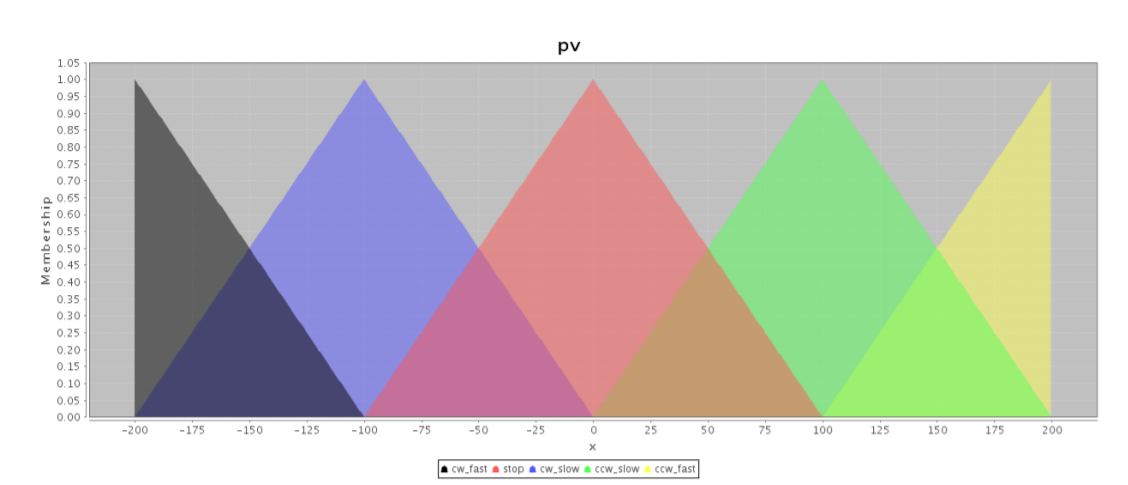

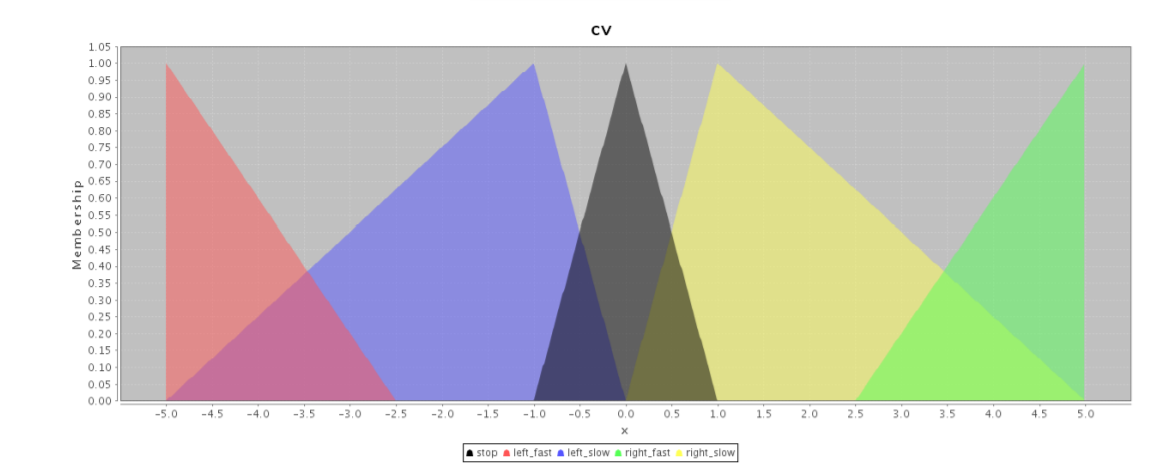

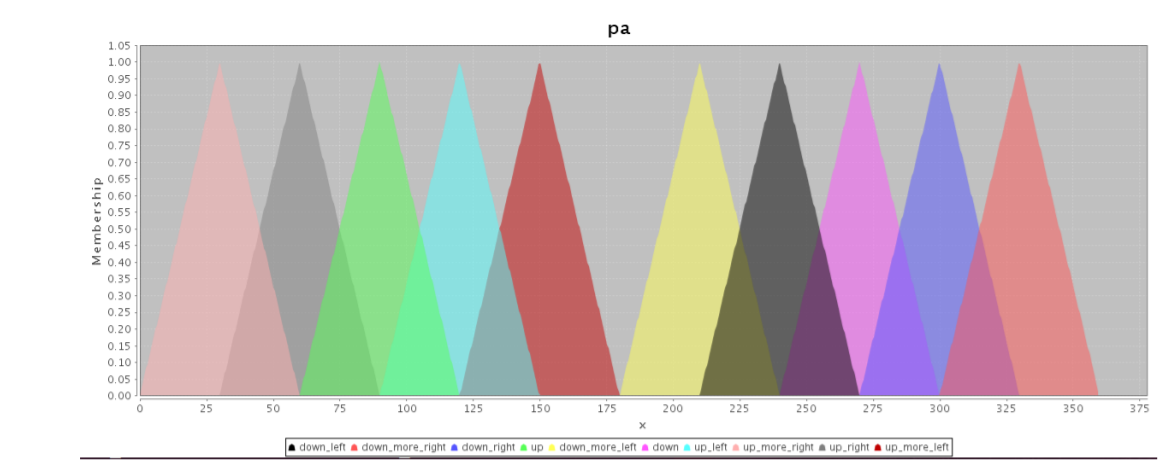

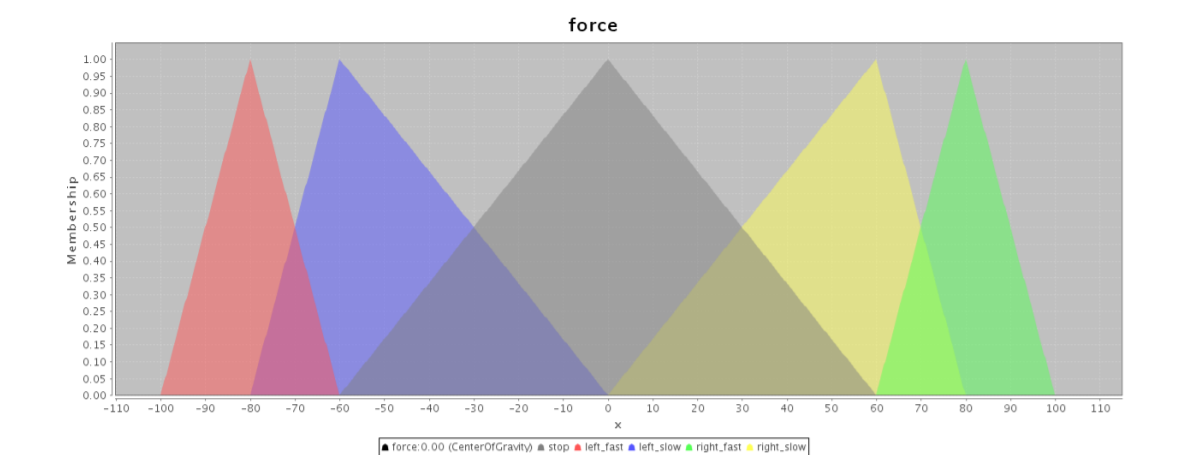

For the force function membership example like below.


```
  def left_fast(self, x, is_in=True):
        if not is_in:
            return 0
        if -80 > x >= -100:
            return float(x + 100) / 20
        elif -60 > x >= -80:
            return float(-x - 60)/ 20
        else:
            return 0

    def left_slow(self, x, is_in=True):
        if not is_in:
            return 0
        if -60 > x >= -80:
            return float(x + 80) / 20
        elif 0 > x >= -60:
            return float(-x) / 60
        else:
            return 0
```


#Inference

After fuzzification we should check the calculated fuzzy value with the defined rule. 


```
IF (pa IS up) AND (pv IS ccw_slow) THEN force IS left_slow
IF (pa IS up) AND (pv IS ccw_fast) THEN force IS left_fast
IF (pa IS up) AND (pv IS cw_slow) THEN force IS right_slow
```
As we know, if the pa value is equal to 0.6 and pv value is 0.7 , the rules became like following code :
```
If 0.6 AND 0.7 then force is left_slow
If 0.6 AND 0 then force is left_fast
If 0.6 AND 0.1 then force is right_slow
```

In fuzzy logic there are different methods for calculating community and subscription operators. Here we use the max and minimum max method. As a result, min = AND and max = OR are calculated. The following statements are obtained with the help of the above statements.
```
Membership(left_slow) = min(0.6,0.7) = 0.6
Membership(left_fast) = min(0.6,0) = 0
Membership(right_slow) = min(0.6,0.1) = 0.1
```
Each calculated value is called a membership for each fuzzy class of force.

I've made 42 laws for this problem which you can see below.
```

rule_0 = max(min(pa_dict["up"], pv_dict["stop"]), min(pa_dict["up_right"], pv_dict["ccw_slow"]),min(pa_dict["up_left"], pv_dict["cw_slow"]))
rule_1 = max(min(pa_dict["up_more_right"], pv_dict["ccw_slow"]), min(pa_dict["up_more_right"], 1 - cv_dict["right_fast"]))
rule_2 = max(min(pa_dict["up_more_right"], pv_dict["cw_slow"]), min(pa_dict["up_more_right"], 1 - cv_dict["right_fast"]))
rule_3 = max(min(pa_dict["up_more_left"], pv_dict["cw_slow"]), min(pa_dict["up_more_left"], 1 - cv_dict["left_fast"]))
rule_4 = max(min(pa_dict["up_more_left"], pv_dict["ccw_slow"]), min(pa_dict["up_more_left"], 1 -  cv_dict["left_fast"]))
rule_5 = max(min(pa_dict["up_more_right"], pv_dict["ccw_fast"]),
                     min(pa_dict["up_more_right"], cv_dict["right_fast"]))
rule_6 = max(min(pa_dict["up_more_right"], pv_dict["cw_fast"]), min(pa_dict["up_more_right"], 1 - cv_dict["right_fast"]))
rule_7 = max(min(pa_dict["up_more_left"], pv_dict["cw_fast"]),min(pa_dict["up_more_left"], cv_dict["left_fast"]))
rule_8 = max(min(pa_dict["up_more_left"], pv_dict["ccw_fast"]), min(pa_dict["up_more_left"], 1 -  cv_dict["left_fast"]))
rule_9 = max(min(pa_dict["down_more_right"], pv_dict["ccw_slow"]), min(pa_dict["down_more_right"], 1 - cv_dict["right_fast"]))
rule_10 = min(pa_dict["down_more_right"], pv_dict["cw_slow"], 1 -  cv_dict["right_slow"])
rule_11 = max(min(pa_dict["down_more_left"], pv_dict["cw_slow"]), min(pa_dict["down_more_left"], 1 -  cv_dict["left_fast"]))
rule_12 = min(pa_dict["down_more_left"], pv_dict["ccw_slow"], 1 -  cv_dict["left_slow"])
["down_more_left"], cv_dict["left_fast"]))
rule_13 = min(pa_dict["down_more_right"], pv_dict["ccw_fast"])
rule_14 = min(pa_dict["down_more_right"], pv_dict["cw_fast"], 1 -  cv_dict["left_slow"])
rule_15 = min(pa_dict["down_more_left"], pv_dict["cw_fast"])        
rule_16 = min(pa_dict["down_more_left"], pv_dict["ccw_fast"], 1 -  cv_dict["left_slow"])rule_17 = max(min(pa_dict["down_right"], pv_dict["ccw_slow"]), min(pa_dict["down_right"], 1 - cv_dict["right_fast"]))
rule_18 = max(min(pa_dict["down_right"], pv_dict["cw_slow"]), min(pa_dict["down_right"], 1 - cv_dict["right_fast"]))
rule_19 = max(min(pa_dict["down_left"], pv_dict["cw_slow"]), min(pa_dict["down_left"], 1 -  cv_dict["left_fast"]))
rule_20 = max(min(pa_dict["down_left"], pv_dict["ccw_slow"]), min(pa_dict["down_left"], 1 -  cv_dict["left_fast"]))
rule_21 = min(pa_dict["down_right"], pv_dict["ccw_fast"], 1 -  cv_dict["right_slow"])
rule_22 = max(min(pa_dict["down_right"], pv_dict["cw_fast"]), min( pa_dict["down_right"], cv_dict["right_fast"]))
rule_23 = min(pa_dict["down_left"], pv_dict["cw_fast"], 1 -  cv_dict["left_slow"])
rule_24 = max(min(pa_dict["down_left"], pv_dict["ccw_fast"]),min(pa_dict["down_left"], cv_dict["left_fast"]))
rule_25 = max(min(pa_dict["up_right"], pv_dict["ccw_slow"]), min(pa_dict["up_right"], cv_dict["right_fast"]))
rule_26 = max(min(pa_dict["up_right"], pv_dict["cw_slow"]), min(pa_dict["up_right"], 1 - cv_dict["right_fast"]))
rule_27 = max(min(pa_dict["up_right"], pv_dict["stop"]) , min(pa_dict["up_right"], 1 - cv_dict["right_fast"]))
rule_28 = max(min(pa_dict["up_left"], pv_dict["cw_slow"]),min(pa_dict["up_left"], cv_dict["left_fast"]))
rule_29 = max(min(pa_dict["up_left"], pv_dict["ccw_slow"]), min(pa_dict["up_left"], 1 -  cv_dict["left_fast"]))
rule_30 = max(min(pa_dict["up_left"], pv_dict["stop"]), min(pa_dict["up_left"], 1 -  cv_dict["left_fast"]))
rule_31 = min(pa_dict["up_right"], pv_dict["ccw_fast"])
rule_32 = min(pa_dict["up_right"], pv_dict["cw_fast"])
rule_33 = max(min(pa_dict["up_left"], pv_dict["cw_fast"]), min(pa_dict["up_left"], cv_dict["left_fast"]))
rule_34 = max(min(pa_dict["up_left"], pv_dict["ccw_fast"]), min(pa_dict["up_left"], cv_dict["right_fast"]))
rule_35 = min(pa_dict["down"], pv_dict["stop"] , min(pa_dict["down"], 1 - cv_dict["right_fast"]))
rule_36 = min(pa_dict["down"], pv_dict["cw_fast"], 1 -  cv_dict["left_slow"])
rule_37 = min(pa_dict["down"], pv_dict["ccw_fast"], 1 -  cv_dict["right_fast"])
rule_38 = max(min(pa_dict["up"], pv_dict["ccw_slow"]),min(pa_dict["up"], cv_dict["left_fast"]))
rule_39 = max(min(pa_dict["up"], pv_dict["ccw_fast"]), min(pa_dict["up"], cv_dict["right_fast"]))
rule_40 = max(min(pa_dict["up"], pv_dict["cw_slow"]) , min(pa_dict["up"], cv_dict["right_fast"]))
rule_41 = max(min(pa_dict["up"], pv_dict["cw_fast"]), min(pa_dict["up"], cv_dict["left_fast"]))
rule_42 = min(pa_dict["up"], pv_dict["stop"], 1 -  cv_dict["stop"])


```


# Defuzzification

Now we have 5 membership values for each class of force. 
An example could be like this:

Left fast = 0

Left slow = 0.6

Stop = 0

Right slow = 0.1

Right fast = 0

We know that the output force is gonna be from -100 neuton to 100. In order to calculate the outpu value, we should apply the OR operator on the calculated values or in other words, get the maximum output of all the applied rules.

Output shape of the mentioned example is shown in the following graph:
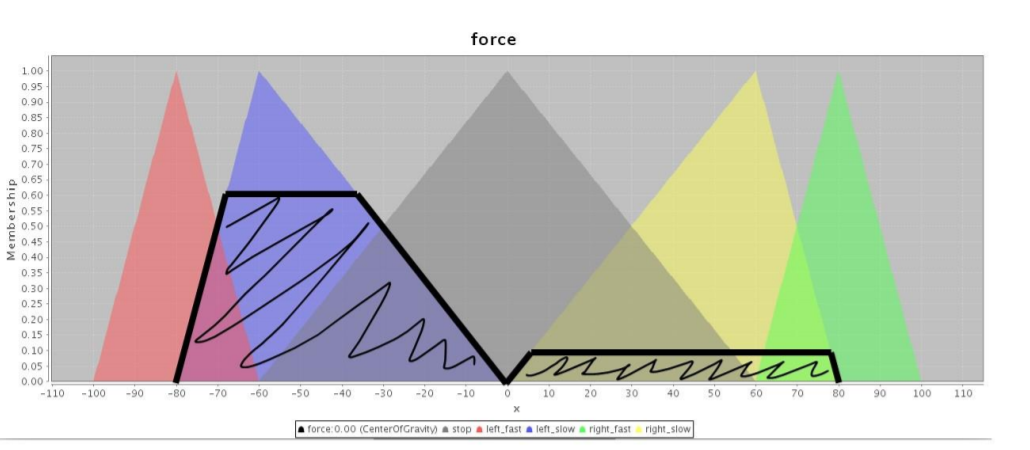

The next step is to calculate the center of mass of the previous graph.In calculating the mass center, I used the basic formula for the center of mass and calculated it integrally.Because nested shapes may be created and in such cases the output function should be fragmented and the integral and the equation facing should be calculated from each piece.

$x^* = \frac{\int \mu_\overline C(x)\cdot x dx}{\int \mu_\overline C(x) dx}$


I used discrete integral form as shown below:
$x^* = \frac{\sum A_i x_i}{\sum A_i}$
Where $A_i$ denotes the calculated value for each value of force same as the previous graph.
```
        for i in range(0, 2000, 1):
            x = -100 + i * 0.1
            # if x == -80 and int(pa) == 206:
            #     print("x == 80 and lfm = ", lfm, "func = ", self.left_fast(x, lfm), "leffas = ", left_fast)

            sum += max(min(self.left_fast(x, lfm), left_fast), min(self.left_slow(x, lsm), left_slow),
                            min(self.f_stop(x, fsm), f_stop), min(self.right_slow(x, rsm), right_slow),
                            min(self.right_fast(x, rfm), right_fast))
            sum_x = sum_x + max(min(self.left_fast(x, lfm), left_fast), min(self.left_slow(x, lsm), left_slow),
                       min(self.f_stop(x, fsm), f_stop), min(self.right_slow(x, rsm), right_slow),
                       min(self.right_fast(x, rfm), right_fast)) * x
```
And the answer is sum_x / sum